In [109]:
import numpy as np
import matplotlib.pyplot as plt
# import pandas as pd
# import seaborn as sns

# Cálculo de autovectores: Método de la potencia

## Ejercicio 1: Metodo de la potencia

Implementar el método de la potencia considerando algún criterio de parada

In [110]:
import numpy as np

def power_iteration(A, niter=10_000, eps=1e-6):
    """
    Calcula el autovector al autovalor asociado de valor máximo

    Devuelve (a, v) con a autovalor, y v autovector de A

    Arguments:
    ----------

    A: np.array
        Matriz de la cual quiero calcular el autovector y autovalor

    niter: int (> 0)
        Cantidad de iteraciones

    eps: Epsilon
        Tolerancia utilizada en el criterio de parada
    """
    sucesion = []
    errores = []
    v = np.arange(1, len(A)+1)
    for i in range(0, niter):
      v = A@v / np.linalg.norm(A@v)
      l =  (v.T @ A @ v) / (v.T @ v)
      sucesion.append(l)
      errores.append(np.linalg.norm(A@v - l*v))
      #if(np.linalg.norm(A@v - l*v)<=eps):
        # break      
    l =  (v.T @ A @ v) / (v.T @ v)

    return l, v, errores

    """
    TODO: Completar el método de la potencia

    IMPORTANTE: Agreguen algún criterio de parada!
    """


Verifiquemos la implementación un ejemplo conocido:

$$
A = Q^T \begin{pmatrix}
d_1    &0     &0      &0      &\\
0      &d_2   &0      &0      &\\
\vdots &\vdots&\ddots &\vdots &\\
0      &0     &0      &d_n    & \\
\end{pmatrix} Q
$$

con $Q = I - 2 v v^T$, $||v||_2=1$
 la matriz de reflexión que sabemos que es ortogonal

Probemos calcular con el método de la potencia el autovector y autovalor dominante.

In [111]:
D = np.diag([5.0, 4.0, 3.0, 2.0, 1.0])

v = np.ones((D.shape[0], 1))

v = v / np.linalg.norm(v)
# Matriz de Householder
B = np.eye(D.shape[0]) - 2 * (v @ v.T)
# Matriz a diagonalizar
M = B.T @ D @ B
power_iteration(M)

(5.0,
 array([-0.6,  0.4,  0.4,  0.4,  0.4]),
 [0.7248412833649807,
  0.5404601879249441,
  0.41691143607791803,
  0.327758169894621,
  0.2603427258856317,
  0.2078895230969113,
  0.16640585217206574,
  0.1333165229409199,
  0.10682000225245744,
  0.08557336582747667,
  0.06853345973451917,
  0.05487172099307555,
  0.04392340905311067,
  0.03515341488680133,
  0.028130863416285675,
  0.022509128928270696,
  0.018009699031114178,
  0.014409041440072233,
  0.011527914602462972,
  0.009222691804285576,
  0.007378342871036819,
  0.005902773552617822,
  0.004722270681552594,
  0.003777843546099054,
  0.0030222888678333314,
  0.0024178383710278706,
  0.0019342744643269655,
  0.0015474215192342413,
  0.0012379382211103814,
  0.000990351095626403,
  0.0007922811438087834,
  0.0006338250526799171,
  0.0005070601129590516,
  0.0004056481267804012,
  0.0003245185201386103,
  0.0002596148257235376,
  0.00020769186551507538,
  0.00016615349494599222,
  0.00013292279725728054,
  0.000106338238472541

# Ejercicio 2: Metodo de la potencia + Deflación

Implementar método de la potencia + deflación

In [112]:
def eigen(A, num=2, niter=10000, eps=1e-6):
    """
    Calculamos num autovalores y autovectores usando método de la potencia+deflación
    """
    A = A.copy()
    eigenvalues = []
    eigenvectors = np.zeros((A.shape[0], num))
    l = 0
    #CAMBIAR A VECTOR RANDOM
    v = np.random.rand(A.shape[1])
    for i in range(num):
      A = A - (l*(v.reshape(-1,1) @ v.reshape(1,-1)))
      #print(A)
      li, vi, sucesion = power_iteration(A, niter)
      eigenvalues.append(li)
      eigenvectors[i]=vi
      v = vi/np.linalg.norm(vi)
      l = li
    return np.array(eigenvalues), eigenvectors

## Casos de prueba

Matriz Diagonal

In [113]:
D = np.diag(range(10, 0, -1))
print(D)

#%%time prender si se quiere medir el tiempo
l, v= eigen(D,10,niter=1000)
print(l, v)

[[10  0  0  0  0  0  0  0  0  0]
 [ 0  9  0  0  0  0  0  0  0  0]
 [ 0  0  8  0  0  0  0  0  0  0]
 [ 0  0  0  7  0  0  0  0  0  0]
 [ 0  0  0  0  6  0  0  0  0  0]
 [ 0  0  0  0  0  5  0  0  0  0]
 [ 0  0  0  0  0  0  4  0  0  0]
 [ 0  0  0  0  0  0  0  3  0  0]
 [ 0  0  0  0  0  0  0  0  2  0]
 [ 0  0  0  0  0  0  0  0  0  1]]
[10.  9.  8.  7.  6.  5.  4.  3.  2.  1.] [[ 1.00000000e+000  3.49574250e-046  3.69069577e-097  5.01302656e-155
   7.08305131e-222  5.59958171e-301  0.00000000e+000  0.00000000e+000
   0.00000000e+000  0.00000000e+000]
 [-3.88415834e-046  1.00000000e+000  1.05576877e-051  1.43403771e-109
   2.02619366e-176  1.60182900e-255  0.00000000e+000  0.00000000e+000
   0.00000000e+000  0.00000000e+000]
 [-1.14349507e-111 -1.18773987e-051  1.00000000e+000  1.35828767e-058
   1.91916423e-125  1.51721574e-204  2.17761511e-301  0.00000000e+000
   0.00000000e+000  0.00000000e+000]
 [ 4.50212843e-170  2.97143632e-124 -1.55232877e-058  1.00000000e+000
   1.41292914e-067  1.1170

Otra matriz de Householder

In [114]:
N = 10
D = np.diag(range(N, 0, -1))

v = np.ones((D.shape[0], 1))
v = v / np.linalg.norm(v)

# Matriz de Householder
B = np.eye(D.shape[0]) - 2 * (v @ v.T)

M = B.T @ D @ B
# Para todos los eigen el ejemplo anterior de householder.
l, v = eigen(M, N, niter=1000)
print(l,v)

[10.  9.  8.  7.  6.  5.  4.  3.  2.  1.] [[-0.8  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2]
 [ 0.2 -0.8  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2]
 [ 0.2  0.2 -0.8  0.2  0.2  0.2  0.2  0.2  0.2  0.2]
 [ 0.2  0.2  0.2 -0.8  0.2  0.2  0.2  0.2  0.2  0.2]
 [ 0.2  0.2  0.2  0.2 -0.8  0.2  0.2  0.2  0.2  0.2]
 [ 0.2  0.2  0.2  0.2  0.2 -0.8  0.2  0.2  0.2  0.2]
 [ 0.2  0.2  0.2  0.2  0.2  0.2 -0.8  0.2  0.2  0.2]
 [ 0.2  0.2  0.2  0.2  0.2  0.2  0.2 -0.8  0.2  0.2]
 [ 0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2 -0.8  0.2]
 [ 0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2 -0.8]]


$A.A^T$ y $A^TA$

In [115]:
#PREGUNTAR QUE ES ESTO
AT = A @ A.T
TA = A.T @ A
wta, VTA = eigen(AT, num=3, niter=20000, eps=1e-24)
wat, VAT = eigen(TA, num=3, niter=20000, eps=1e-24)
assert(np.allclose(wat,wta))

ValueError: could not broadcast input array from shape (10,) into shape (3,)

# Ejercicio 3: Velocidad de convergencia

* Graficar, para la matriz M definida abajo, los valores de la sucesión {$\lambda^{k}$} del autovalor dominante. Considerar, si fuera necesario, extender el método implementado anteriormente para obtener la suecesión.

In [ ]:
D = np.diag([5.0, 4.0, 3.0, 2.0, 1.0])

v = np.ones((D.shape[0], 1))

v = v / np.linalg.norm(v)

# Matriz de Householder
B = np.eye(D.shape[0]) - 2 * (v @ v.T)

# Matriz a diagonalizar
M = B.T @ D @ B

l,v,sucesion = power_iteration(D,1000)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


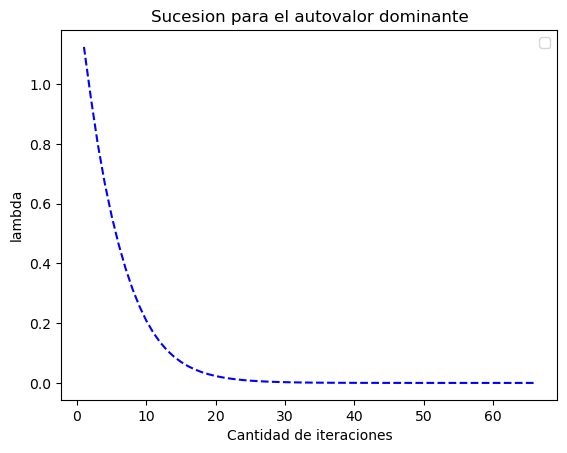

In [ ]:
#cambiar escala de x
plt.plot(np.arange(1, len(sucesion)+1),sucesion, 'b--')  # Línea para n^1
# Añadiendo detalles al gráfico
plt.title('Sucesion para el autovalor dominante')
plt.xlabel('Cantidad de iteraciones')
plt.ylabel('lambda')
plt.legend()  # Esto muestra las etiquetas de cada conjunto de puntos
#plt.savefig('eliminacion_gaussiana_vs_precomputo.png')
# Mostrar el gráfico
plt.show()

**Recordemos que**:

Sea ${x_k}$ k ∈ N una sucesión tal que:

$$lim_{k→∞} x_k = x^*$$

Decimos que ${x_k}$ k ∈ N tiene orden de convergencia $p$ si:

$$lim_{k→∞} \frac{|x_{k+1} − x^∗|}{ (|x_k − x^∗ |)^p} =  c > 0 $$



Existen otras formas de definir la noción de velocidad de convergencia como:

Sea ${\alpha_n}$ convergente a $\alpha$. Sea ${\beta_n}$ convergente a 0.

Decimos que ${\alpha_n}$ tiene orden de convergencia $O(\beta_n)$ (o que αn converge tan rápido como $\beta_{n}$) si existe:

 c > 0 tal que $|\alpha_n − \alpha| ≤ c\beta_n$ para todo
n suficientemente grande.




* Analizar la velocidad de convergencia para la sucesión {$\lambda^{k}$} del autovalor dominante.
Considerar, si fuera necesario, extender el método implementado anteriormente para obtener los errores $|\lambda^{k} - \lambda^*|$ (utilizar la segunda definición de velocidad de convergencia)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


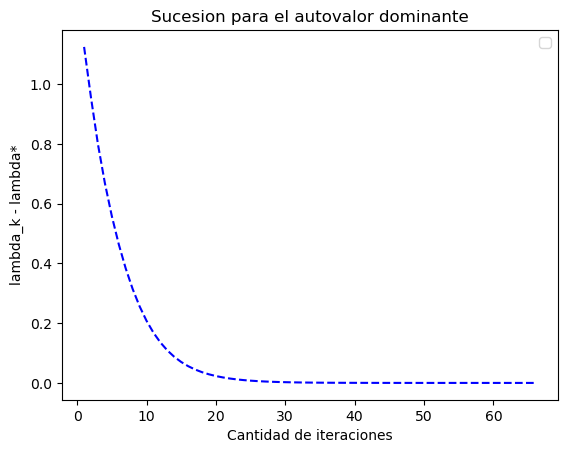

In [ ]:
#cambiar escala de x
plt.plot(np.arange(1, len(sucesion)+1),sucesion, 'b--')  # Línea para n^1
# Añadiendo detalles al gráfico
plt.title('Sucesion para el autovalor dominante')
plt.xlabel('Cantidad de iteraciones')
plt.ylabel('lambda_k - lambda*')
plt.legend()  # Esto muestra las etiquetas de cada conjunto de puntos
#plt.savefig('eliminacion_gaussiana_vs_precomputo.png')
# Mostrar el gráfico
plt.show()


Analizar la velocidad de convergencia de la sucesión {$v^{k}$}) al autovector dominante

**Imporante: ¿Contra que vector comparamos?**

* En algunos casos podemos no conocer el vector en cuestión.
* Además para el caso de autovalores repetidos, no sabemos exactamente a que combinación del autoespacio cae el vector de la sucesión.



*Obs:Para este caso particular, la convergencia al autovector dominante $e_1$ se da como esperamos*

In [ ]:
...

La forma sugerida en el tp, que evita esos problemas, es considerar $$ ||Av -\lambda v||$$

* Graficar la sucesión de tales errores y comparar.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


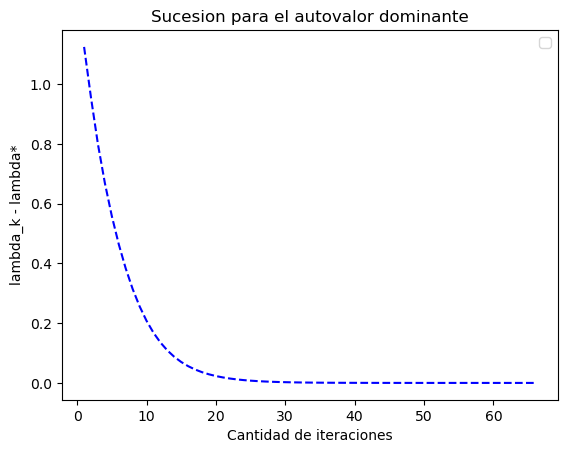

In [ ]:
#cambiar escala de x
plt.plot(np.arange(1, len(sucesion)+1),sucesion, 'b--')  # Línea para n^1
# Añadiendo detalles al gráfico
plt.title('Sucesion para el autovalor dominante')
plt.xlabel('Cantidad de iteraciones')
plt.ylabel('lambda_k - lambda*')
plt.legend()  # Esto muestra las etiquetas de cada conjunto de puntos
#plt.savefig('eliminacion_gaussiana_vs_precomputo.png')
# Mostrar el gráfico
plt.show()

# Ejercicio 4:

Considerar matrices aleatorias construidas con "el truco de Householder" con los auotvalores dados por $(10,7.75,5.5,3.25,1)$.

Reportar y analizar el error $|| Av - \lambda v ||$ obtenido para cada autovector fijando 300 iteraciones del método de la potencia (sin método de corte).

Recordar mostrar alguna noción de centralidad y dispersión para cada grupo de mediciones.

In [ ]:
reps = 3000

eigen_errors = []
niters = []

e = 0.01
for r in reps:

  D = np.diag(np.linspace(1,10,5))
  v = np.random.rand(D.shape[0],1)
  v = v / np.linalg.norm(v)

  # Matriz de Householder
  B = np.eye(D.shape[0]) - 2 * (v @ v.T)

  # Matriz a diagonalizar
  M = B.T @ D @ B

  l, V, errors = eigen(M,5,niter=300,eps=1e-200)
  eigen_errors.append(errors)

medias = np.mean(eigen_errors, axis=0)
desvios = np.std(eigen_errors, axis=0)

#Grafico de boxplots eje x autovectores 
# PLOT
...

# Ejercicio 5:

Considerar matrices aleatorias construidas con "el truco de Householder" con los auotvalores dados por $[2, 2-e, 1.9, 1.9-e, 1.8]$ siendo $e = 0.01$.

Reportar y analizar la cantidad de iteraciones obtenido para cada autovector habilitando el método de corte (ajsutando niter y eps de manera que el allclose pase).  

Recordar mostrar alguna noción de centralidad y dispersión para cada grupo de mediciones.

In [ ]:
reps = range(50)

eigen_errors = []
niters = []
niters = []
e = 0.01
for r in reps:
  D = np.diag([2, 2-e, 1.9, 1.9-e, 1.8]).astype(np.float64)
  print(D)
  v = 4*np.random.randn(D.shape[0], 1)
  v = v / np.linalg.norm(v)

  # Matriz de Householder
  B = np.eye(D.shape[0]) - 2 * (v @ v.T)

  # Matriz a diagonalizar
  M = B.T @ D @ B

  l, V, errors = eigen(M,4,niter=...,eps=...)
  n = []
  for er in errors[3]:
    n.append(len(er))
  niters.append(n)
  #eigen_errors.append(np.array(errors[3])[:,-1])
  #niters.append(len(e))


  for i in range(len(l)-1):
    assert(np.allclose(M@V[:,i], l[i] * V [:,i], atol=1e-6))

